# Анализ данных

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3> Загружаем файл

In [277]:
df = pd.read_csv('main_v2.csv') # Читаем файл
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,Метражи group,real_estate_agent,https://www.cian.ru/sale/flat/308167237/,Москва,sale,flat,5.0,7.0,1.0,34.6,...,-1.0,-1,18,8,7.985041e+10,Северное Измайлово,15-я Парковая,54,Щёлковская,NaN
1,Alliance Agency Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/298254403/,Москва,sale,flat,4.0,33.0,1.0,42.9,...,-1.0,-1,23,15,7.965188e+10,Останкинский,Годовикова,11к2,Алексеевская,iLove
2,Зиля Карамова,realtor,https://www.cian.ru/sale/flat/263316279/,Москва,sale,flat,1.0,16.0,1.0,37.7,...,-1.0,-1,-1,-1,7.916094e+10,Чертаново Центральное,Варшавское шоссе,142К2,Пражская,NaN
3,Омега-Эстейт,real_estate_agent,https://www.cian.ru/sale/flat/303983520/,Москва,sale,flat,13.0,17.0,1.0,37.6,...,-1.0,-1,18,15,7.985243e+10,NaN,Бачуринская,7к2,Бачуринская,Новая Звезда
4,Dream Realty,real_estate_agent,https://www.cian.ru/sale/flat/307043068/,Москва,sale,flat,9.0,28.0,1.0,34.7,...,-1.0,-1,9,14,7.915350e+10,Богородское,Открытое шоссе,14Д,Бульвар Рокоссовского,Талисман на Рокоссовского


<h3> Удаляем лишние колонки

In [278]:
df.drop(['author'], axis=1,inplace=True) # Имя владельца не интересно
df.drop(['deal_type'], axis=1,inplace=True) # Тип сделки нам не важен
df.drop(['accommodation_type'], axis=1,inplace=True) # Тип здания нам не важен
df.drop(['phone'], axis=1,inplace=True) # Номер телефона нам тоже не нужен
df.drop(['house_number'], axis=1,inplace=True) # Номер дома не нужен
df.drop(['heating_type'], axis=1,inplace=True) # Тип отопления не нужен
df.drop(['object_type'], axis=1,inplace=True) # Тип дома не нужен
df.drop(['street'], axis=1,inplace=True) # Улица не нужна, т.к. важна станция метро и район
df.drop(['residential_complex'], axis=1,inplace=True) # Жилой комплекс не важен
df.drop(['url'], axis=1,inplace=True) # Ссылка на объявление не нужна
df = df[df['year_of_construction'] >= 1955] # Убираем старинные здания

<h3> Заполнем пропуски

In [279]:
df = df.replace(-1, np.nan) # Заполняем пустые ячейки Nan
df = df.replace('-1', np.nan) # Заполняем пустые ячейки Nan
df = df.replace(-1.0, np.nan) # Заполняем пустые ячейки Nan
df = df.replace('-1.0', np.nan) # Заполняем пустые ячейки Nan

In [280]:
df.head() # После удаления проверяем целостность информации

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,house_material_type,finish_type,living_meters,kitchen_meters,district,underground
0,real_estate_agent,Москва,5.0,7.0,1.0,34.6,9000000.0,1978,NaN,NaN,18.0,8.0,Северное Измайлово,Щёлковская
2,realtor,Москва,1.0,16.0,1.0,37.7,9450000.0,1982,NaN,NaN,NaN,NaN,Чертаново Центральное,Пражская
3,real_estate_agent,Москва,13.0,17.0,1.0,37.6,11000000.0,2018,NaN,NaN,18.0,15.0,NaN,Бачуринская
4,real_estate_agent,Москва,9.0,28.0,1.0,34.7,14500000.0,2023,NaN,NaN,9.0,14.0,Богородское,Бульвар Рокоссовского
6,real_estate_agent,Москва,5.0,9.0,1.0,34.1,10990000.0,1970,NaN,NaN,17.0,8.0,Чертаново Центральное,Пражская


<h3> Проверяем и удаляем дубликаты

In [281]:
num_duplicates = df.duplicated().sum()
print("Кол-во дубликатов:", num_duplicates)

Кол-во дубликатов: 36


In [282]:
df.drop_duplicates()
print(f'Датафрейм после удаления дубликатов имеет {df.shape[0]} строк ')

Датафрейм после удаления дубликатов имеет 6981 строк 


<h3> Проверяем пропуски

<Axes: >

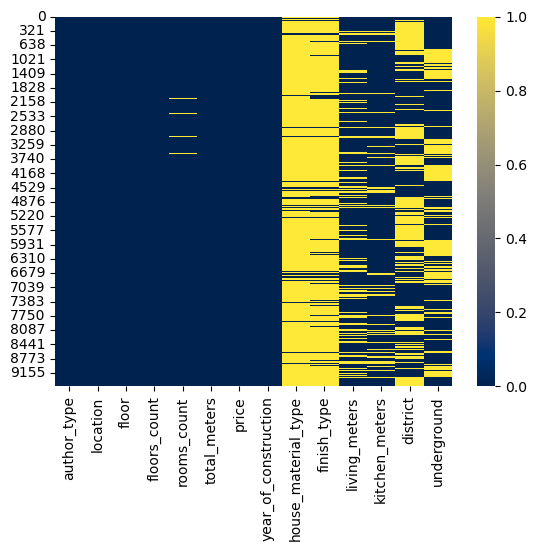

In [283]:
sns.heatmap(df.isnull(), cmap='cividis')

<h3> Пустые колонки в процентах

In [284]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 1%
total_meters - 0%
price - 0%
year_of_construction - 0%
house_material_type - 94%
finish_type - 90%
living_meters - 22%
kitchen_meters - 11%
district - 45%
underground - 34%


<h3> Удаление пустых колонок

In [285]:
df.drop(['house_material_type'], axis=1,inplace=True) # Удаляем материал дома, т.к. недостаточно данных
df.drop(['finish_type'], axis=1,inplace=True) # Удаляем финишную отделку квартиры, т.к. недостаточно данных
df.head(5)

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,underground
0,real_estate_agent,Москва,5.0,7.0,1.0,34.6,9000000.0,1978,18.0,8.0,Северное Измайлово,Щёлковская
2,realtor,Москва,1.0,16.0,1.0,37.7,9450000.0,1982,NaN,NaN,Чертаново Центральное,Пражская
3,real_estate_agent,Москва,13.0,17.0,1.0,37.6,11000000.0,2018,18.0,15.0,NaN,Бачуринская
4,real_estate_agent,Москва,9.0,28.0,1.0,34.7,14500000.0,2023,9.0,14.0,Богородское,Бульвар Рокоссовского
6,real_estate_agent,Москва,5.0,9.0,1.0,34.1,10990000.0,1970,17.0,8.0,Чертаново Центральное,Пражская


<h3> Вторая проверка на пустые значения

<Axes: >

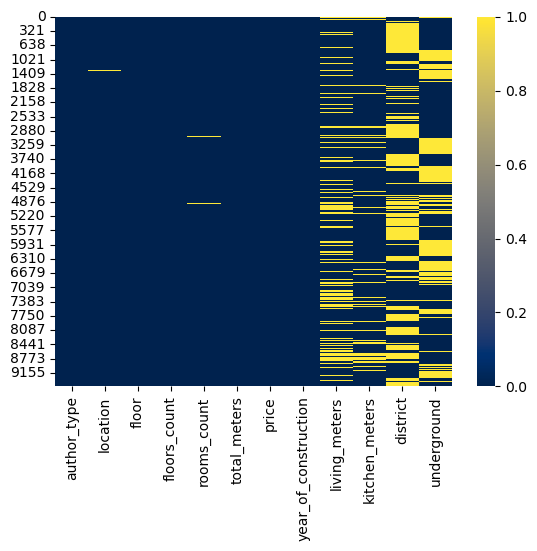

In [286]:
sns.heatmap(df.isnull(), cmap='cividis')

In [287]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

author_type - 0%
location - 0%
floor - 0%
floors_count - 0%
rooms_count - 1%
total_meters - 0%
price - 0%
year_of_construction - 0%
living_meters - 22%
kitchen_meters - 11%
district - 45%
underground - 34%


<h3> Создаем колонку с ценой квадратного метра каждой квартиры

In [288]:
df['price_per_sqm'] = df['price']/df['total_meters'].astype(int) # Создаем колонку с ценой квадратного метра

<h3> Кодируем наши object данные

In [289]:
from sklearn import preprocessing

def number_encode_features(df_encode):
    result = df_encode.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

encoded_df, encoders = number_encode_features(df)
encoded_df.head()


,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,underground,price_per_sqm
0,3,32,5.0,7.0,1.0,34.6,9000000.0,1978,18.0,8.0,160,318,264705.882353
2,4,32,1.0,16.0,1.0,37.7,9450000.0,1982,NaN,NaN,203,214,255405.405405
3,3,32,13.0,17.0,1.0,37.6,11000000.0,2018,18.0,15.0,301,19,297297.297297
4,3,32,9.0,28.0,1.0,34.7,14500000.0,2023,9.0,14.0,16,35,426470.588235
6,3,32,5.0,9.0,1.0,34.1,10990000.0,1970,17.0,8.0,203,214,323235.294118


<h3> График зависимости цены квадратного метра от года постройки дома

In [290]:
average_prices = df.groupby('year_of_construction')['price_per_sqm'].mean().reset_index().astype(int) # Группируем год постройки дома и среднюю цену квадратного метра в году

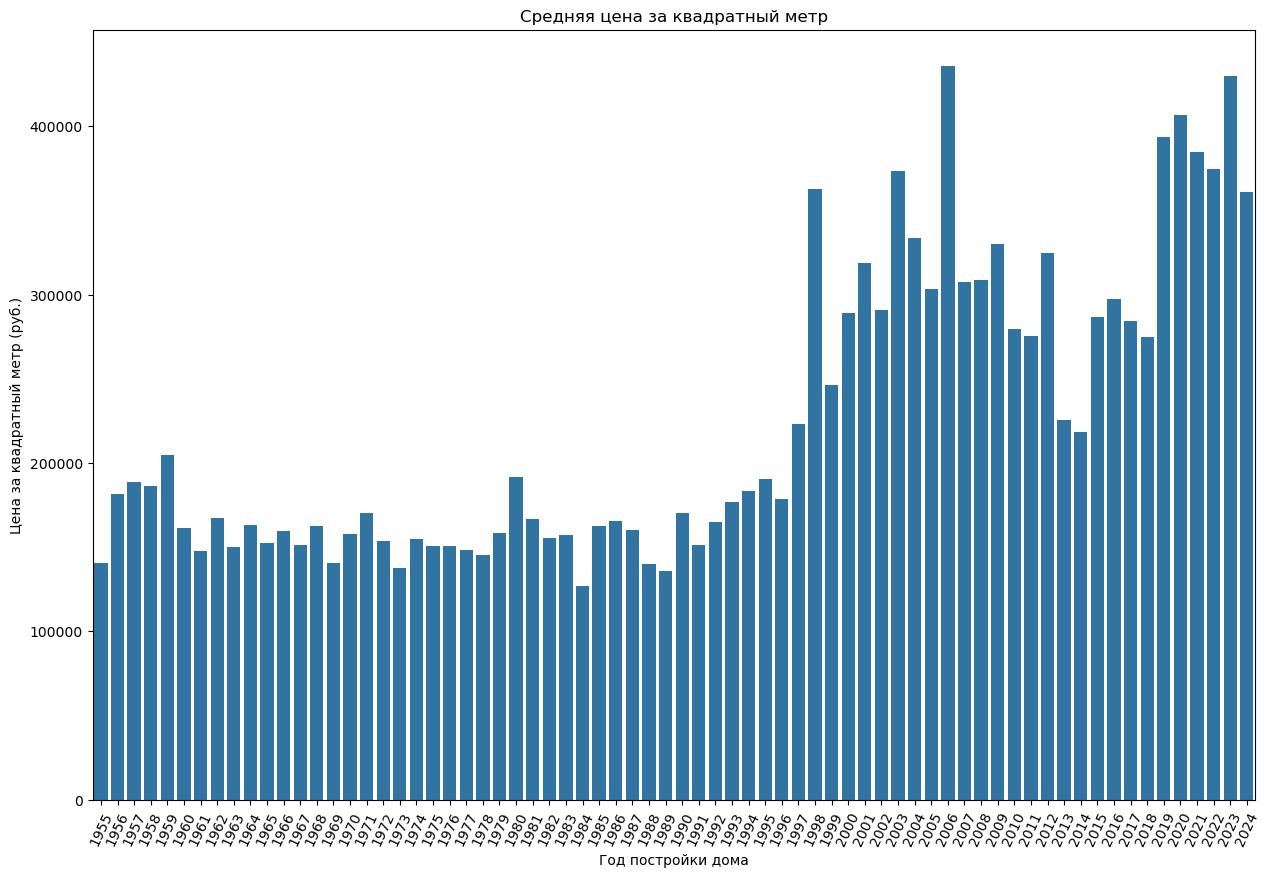

In [291]:
plt.figure(figsize=(15, 10))
sns.barplot(x='year_of_construction', y='price_per_sqm', data=average_prices)
plt.title('Средняя цена за квадратный метр')
plt.xlabel('Год постройки дома')
plt.ylabel('Цена за квадратный метр (руб.)')
plt.xticks(rotation=65)
plt.show()

<h3> График зависимости цены квадратного метра от количества комнат в квартире

In [292]:
rooms_metr = round(df.groupby('rooms_count')['price_per_sqm'].mean().reset_index(), 0).astype(int).sort_values(by='price_per_sqm')
rooms_metr

,rooms_count,price_per_sqm
1,2,186732
0,1,239773
2,3,280361
3,4,451794
4,5,604393


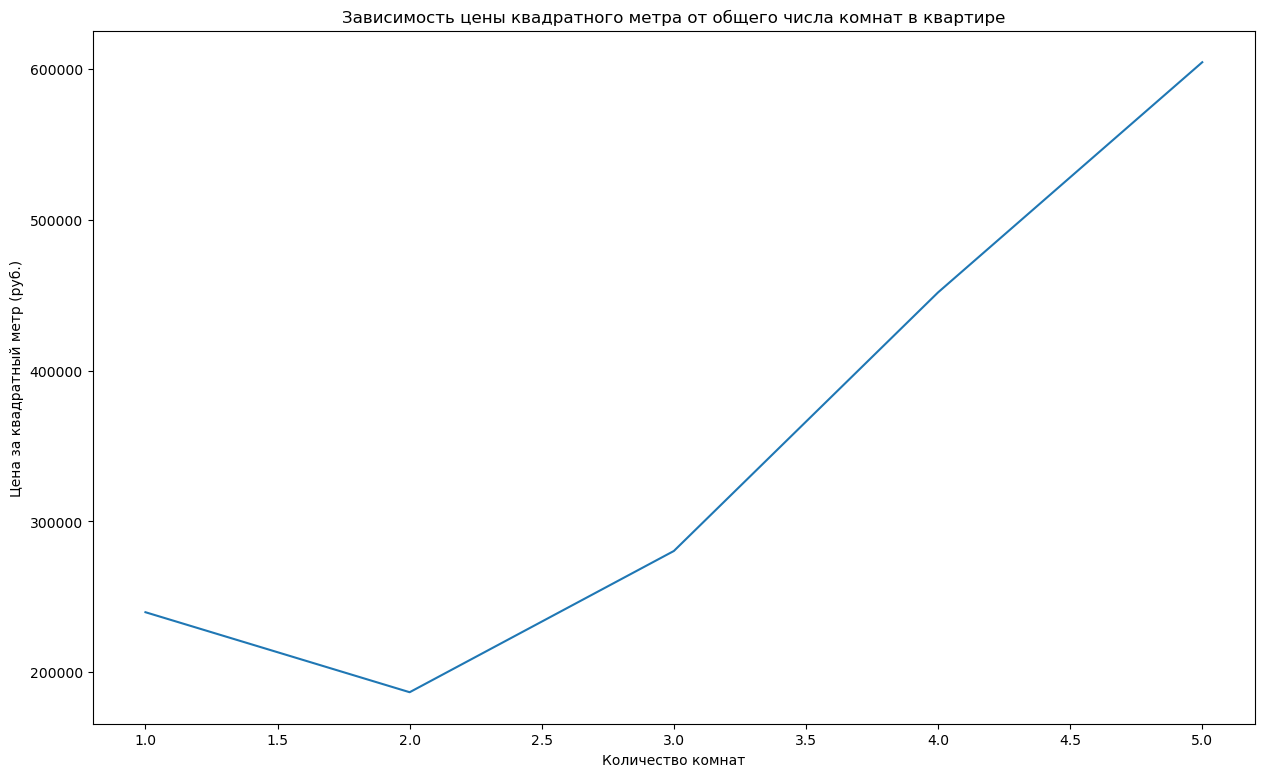

In [293]:
plt.figure(figsize=(15, 9))
sns.lineplot(data=rooms_metr, x='rooms_count', y='price_per_sqm')
plt.title('Зависимость цены квадратного метра от общего числа комнат в квартире')
plt.xlabel('Количество комнат')
plt.ylabel('Цена за квадратный метр (руб.)')
plt.xticks(rotation=0)
plt.show()

<h3> График зависимости цены квадратного метра от города

In [294]:
city_pricemetr = round(df.groupby('location')['price_per_sqm'].mean().reset_index(), 0).sort_values(by='price_per_sqm')
# Группируем город и среднюю цену квадратного метра в городе, а так же сортируем по возрастанию

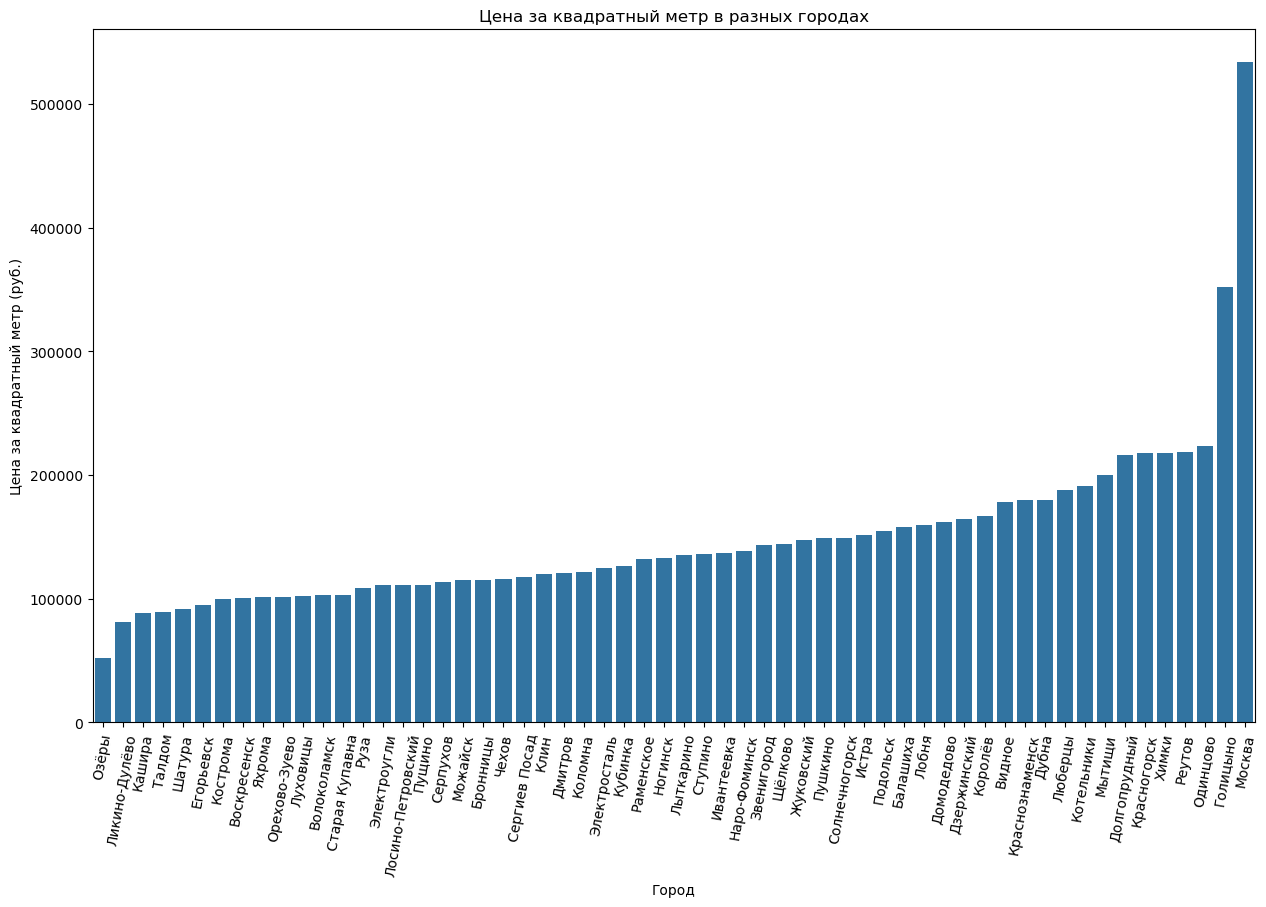

In [295]:
plt.figure(figsize=(15, 9))
sns.barplot(data=city_pricemetr, x='location', y='price_per_sqm')
plt.title('Цена за квадратный метр в разных городах')
plt.xlabel('Город')
plt.ylabel('Цена за квадратный метр (руб.)')
plt.xticks(rotation=80)
plt.show()

<h3> График зависимости цены квадратного метра от района Москвы

In [296]:
moscow_df = df[df['location'] == 'Москва']

# Группируем по району и находим среднюю цену квадратного метра
grouped_df = round(moscow_df.groupby('district')['price_per_sqm'].mean().reset_index(), 0).sort_values(by='price_per_sqm')

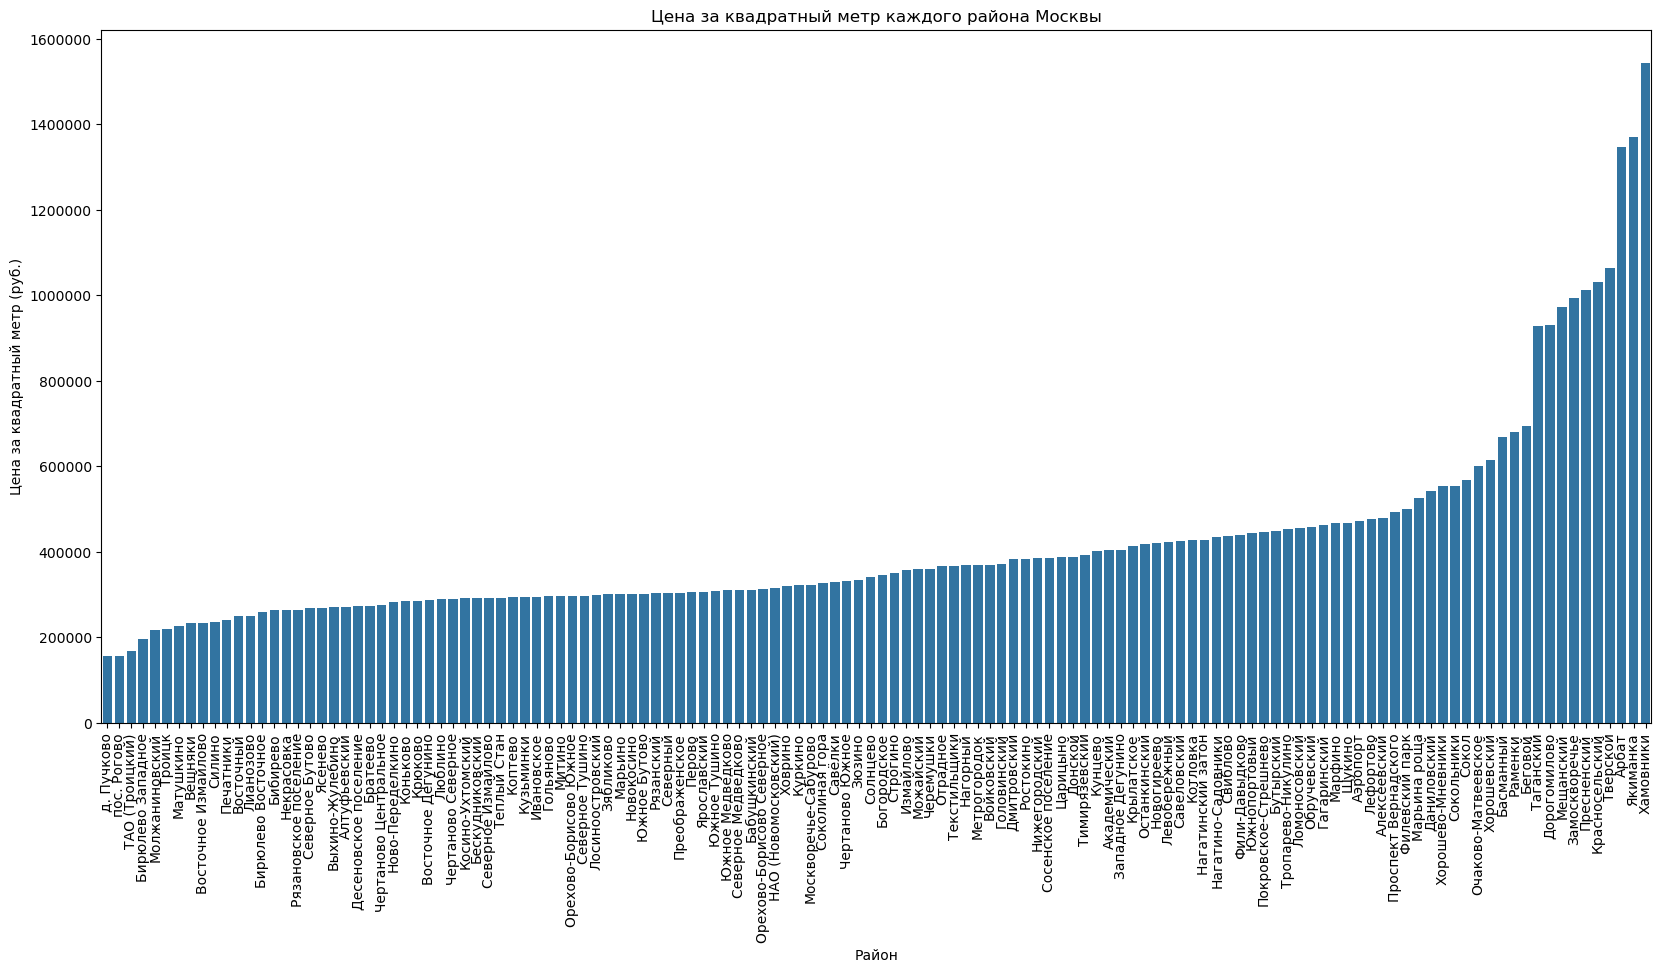

In [297]:
plt.figure(figsize=(20, 9))
sns.barplot(data=grouped_df, x='district', y='price_per_sqm')
plt.title('Цена за квадратный метр каждого района Москвы')
plt.xlabel('Район')
plt.ylabel('Цена за квадратный метр (руб.)')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

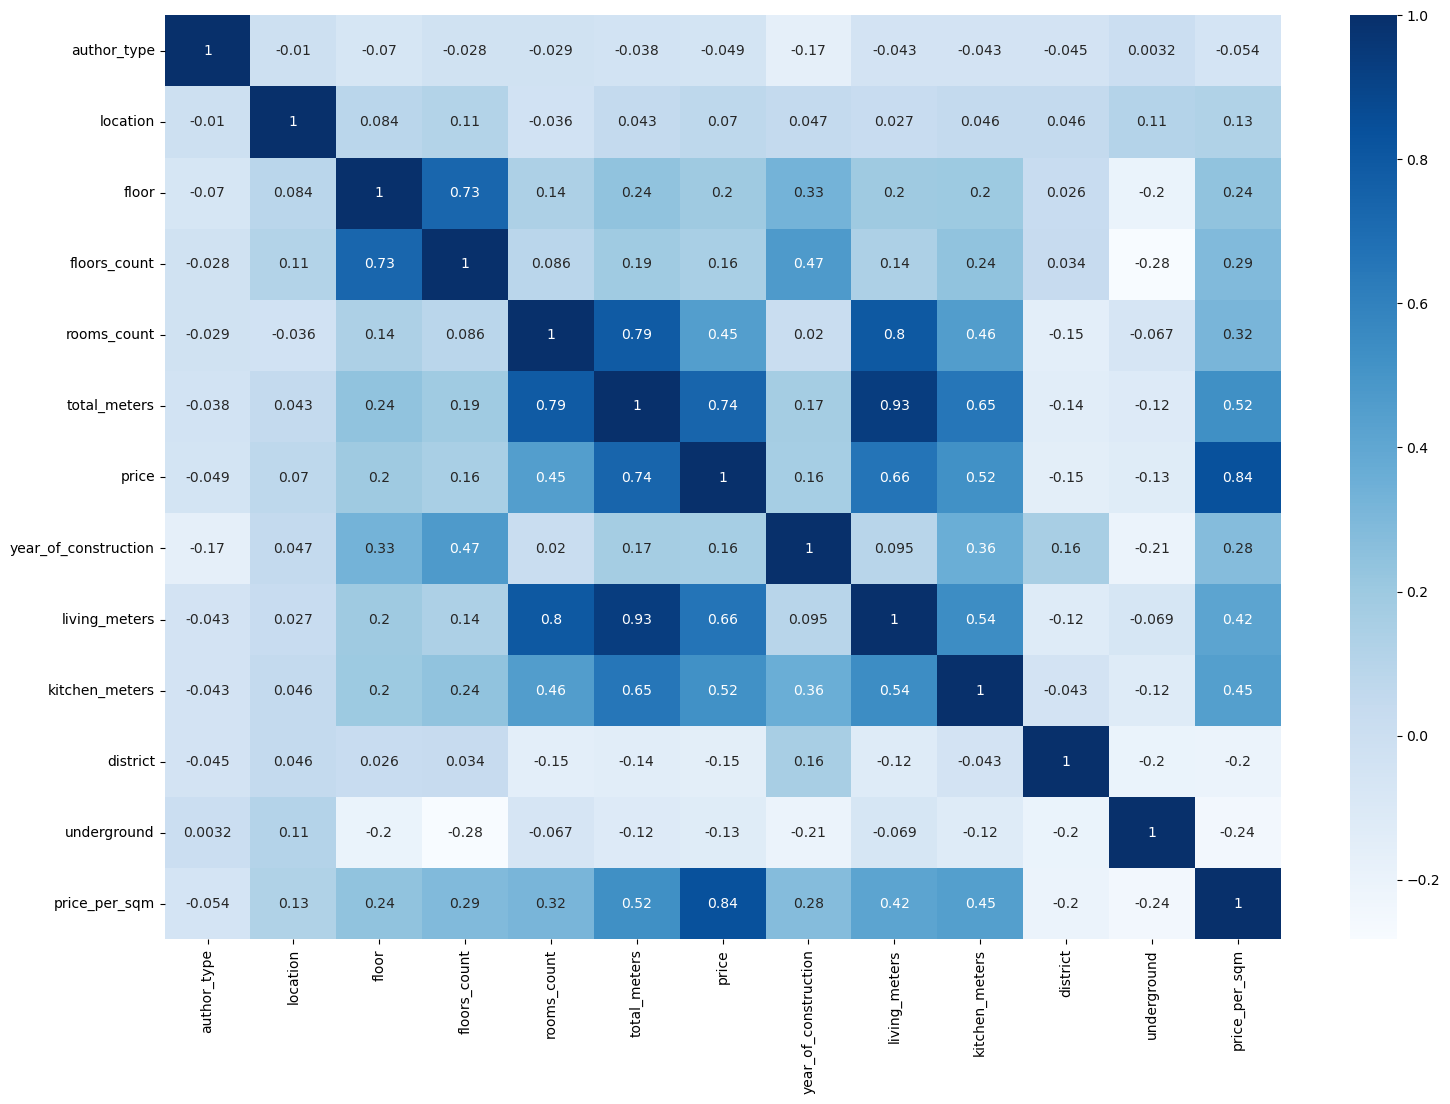

In [300]:
plt.figure(figsize=(18, 12))
sns.heatmap(encoded_df.corr(), annot=True, cmap='Blues')
plt.show()